<a href="https://colab.research.google.com/github/namoshi/colab/blob/master/iris_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms



In [2]:
data = load_iris()
X = data.data
Y = data.target
Name = data.target_names

print('X', X.shape)
# print('Y', Y)
# print('Name', Name)

# normalize the X 
ss = StandardScaler()

X = ss.fit_transform(X)
print(X)

train_dataset = X.astype(np.float32)
#train_dataset.dtype = 'float32'
print(train_dataset.shape)

# set data loader
train_loader = torch.utils.data.DataLoader(
      dataset=train_dataset,  # データセットの指定
      batch_size=10,  # ミニバッチの指定
      shuffle=True,  # シャッフルするかどうかの指定
      num_workers=2)  # コアの数

X (150, 4)
[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -

In [3]:
# Linear Multi Layer Perceptron Network
class MLP (nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(4, 2)   
        self.fc2 = nn.Linear(2, 4)
        
    def forward(self, x):
        y = self.fc1(x)
        z = self.fc2(y)
        return z
 

In [4]:
# select device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

net = MLP().to(device)

print(net)

# optimizing
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)


cuda
MLP(
  (fc1): Linear(in_features=4, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=4, bias=True)
)


In [5]:
###  training
print ('training start ...')
num_epochs = 50   
 
# initialize list for plot graph after training
train_loss_list = []

for epoch in range(num_epochs):
    # initialize each epoch
    train_loss = 0
    
    # ======== train_mode ======
    net.train()
    for i, xx in enumerate(train_loader):
#      print('i=',i)
#      print(xx)

      xx=xx.to(device)
      optimizer.zero_grad()
      outputs = net(xx)
      loss = criterion(outputs, xx)
      train_loss += loss.item()
      loss.backward()
      optimizer.step()
      avg_train_loss = train_loss / len(train_loader.dataset)
    # print log
    print ('Epoch [{}/{}], Loss: {loss:.4f}' 
                   .format(epoch+1, num_epochs, i+1, loss=avg_train_loss))
    # append list for polt graph after training
    train_loss_list.append(avg_train_loss)


training start ...
Epoch [1/50], Loss: 0.1440
Epoch [2/50], Loss: 0.1156
Epoch [3/50], Loss: 0.0937
Epoch [4/50], Loss: 0.0791
Epoch [5/50], Loss: 0.0691
Epoch [6/50], Loss: 0.0612
Epoch [7/50], Loss: 0.0546
Epoch [8/50], Loss: 0.0493
Epoch [9/50], Loss: 0.0449
Epoch [10/50], Loss: 0.0411
Epoch [11/50], Loss: 0.0380
Epoch [12/50], Loss: 0.0352
Epoch [13/50], Loss: 0.0329
Epoch [14/50], Loss: 0.0307
Epoch [15/50], Loss: 0.0288
Epoch [16/50], Loss: 0.0271
Epoch [17/50], Loss: 0.0255
Epoch [18/50], Loss: 0.0241
Epoch [19/50], Loss: 0.0226
Epoch [20/50], Loss: 0.0213
Epoch [21/50], Loss: 0.0201
Epoch [22/50], Loss: 0.0188
Epoch [23/50], Loss: 0.0177
Epoch [24/50], Loss: 0.0166
Epoch [25/50], Loss: 0.0155
Epoch [26/50], Loss: 0.0145
Epoch [27/50], Loss: 0.0136
Epoch [28/50], Loss: 0.0126
Epoch [29/50], Loss: 0.0118
Epoch [30/50], Loss: 0.0110
Epoch [31/50], Loss: 0.0103
Epoch [32/50], Loss: 0.0096
Epoch [33/50], Loss: 0.0090
Epoch [34/50], Loss: 0.0084
Epoch [35/50], Loss: 0.0079
Epoch [36/

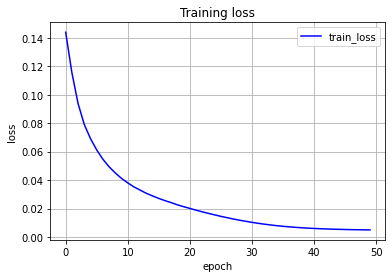

In [6]:
# plot graph
import matplotlib.pyplot as plt
 
plt.figure()
plt.plot(range(num_epochs), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training loss')
plt.grid()


pred
[[-1.0524849   1.0049198  -1.2727785  -1.1503654 ]
 [-1.2936878  -0.12029168 -1.182797   -1.189872  ]
 [-1.3775859   0.3190894  -1.3856056  -1.3451785 ]
 [-1.4212385   0.13272418 -1.3741889  -1.3552719 ]
 [-1.0846701   1.2338616  -1.3675969  -1.220234  ]
 [-0.6675314   1.8711642  -1.1544385  -0.9289133 ]
 [-1.3384902   0.74992377 -1.4702039  -1.3811121 ]
 [-1.1156656   0.8000517  -1.2745337  -1.1760278 ]
 [-1.606184   -0.33252078 -1.4172158  -1.4533038 ]
 [-1.2753887   0.16713452 -1.2465637  -1.2213067 ]
 [-0.8100927   1.4673791  -1.1748788  -0.9967835 ]
 [-1.2110313   0.8241256  -1.3711073  -1.271559  ]
 [-1.3776255  -0.07473935 -1.2746632  -1.2781069 ]
 [-1.7234439  -0.11632077 -1.5885439  -1.6025642 ]
 [-0.56310385  2.0791981  -1.1147401  -0.86424613]
 [-0.4079377   2.9565847  -1.2158916  -0.8649944 ]
 [-0.74564344  1.7971528  -1.2071271  -0.99118906]
 [-1.0259942   0.9621527  -1.235785   -1.1176804 ]
 [-0.54694337  1.6794178  -0.9868679  -0.78062916]
 [-0.9306807   1.6591253  

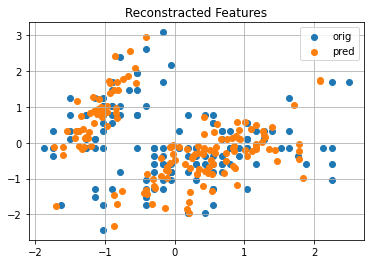

In [7]:
train_batch = torch.from_numpy(train_dataset).to(device)

net.eval()
pred = net(train_batch).to('cpu').detach().numpy().copy()

print('pred')
print(pred)
#print('diff')
#print(train_dataset - pred)

plt.figure()
plt.scatter(train_dataset[:,0], train_dataset[:,1], label='orig')
plt.scatter(pred[:,0], pred[:,1], label='pred')
plt.legend()
plt.title('Reconstracted Features')
plt.grid()

[[-1.6454382e+00  1.1073729e+00]
 [-6.6659337e-01  1.7083939e+00]
 [-1.1817278e+00  1.7106134e+00]
 [-1.0223684e+00  1.8150848e+00]
 [-1.9052464e+00  1.0931901e+00]
 [-2.2502887e+00  3.7959141e-01]
 [-1.5962677e+00  1.5513390e+00]
 [-1.4815968e+00  1.2424295e+00]
 [-6.8123919e-01  2.1769540e+00]
 [-9.4895762e-01  1.6124901e+00]
 [-1.9408251e+00  6.6977435e-01]
 [-1.5775636e+00  1.3633033e+00]
 [-7.7615196e-01  1.8087173e+00]
 [-9.9141723e-01  2.2791207e+00]
 [-2.3866072e+00  1.8887489e-01]
 [-3.1744273e+00 -2.3598871e-01]
 [-2.2323604e+00  5.0193244e-01]
 [-1.5816219e+00  1.0827792e+00]
 [-1.9628118e+00  2.6690906e-01]
 [-2.2283020e+00  7.8245676e-01]
 [-1.3075916e+00  8.7834108e-01]
 [-1.9504198e+00  8.4777528e-01]
 [-2.0702875e+00  1.5184491e+00]
 [-1.0393040e+00  1.1216606e+00]
 [-1.5910100e+00  1.2715476e+00]
 [-6.2981522e-01  1.5714939e+00]
 [-1.3584465e+00  1.1626567e+00]
 [-1.6041781e+00  1.0010581e+00]
 [-1.3856299e+00  1.1215558e+00]
 [-1.1951741e+00  1.6188575e+00]
 [-9.35365

No handles with labels found to put in legend.


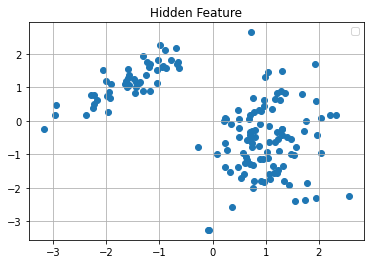

In [8]:

hidden = net.fc1(train_batch).to('cpu').detach().numpy().copy()
print(hidden)

plt.figure()
plt.scatter(hidden[:,0], hidden[:,1])
plt.legend()
plt.title('Hidden Feature')
plt.grid()